In [19]:
# figサイズのテンプレート
template1=(15,6)
exDataIsAll=True

import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt

# DATA collectiong

## get area ID

In [20]:
import pandas as pd
PATH = '../csv_data/meshID/ID_Kurashiki_Mabicho_zentai.csv'
df = pd.read_csv(PATH)
print(df.head())

# KEY_CODEを追加していく
areas = []
for area in df['KEY_CODE']:
    # print(area)
    areas.append(area)

print()
# print(f'{len(areas)} areas in total：{areas}')

# SQLで送信するようにデータを加工
areas_str=''
for k in areas:
    areas_str+=(str(k)+',')
areas_str=areas_str[:-1]  #最後の一文字に余分なカンマが入っているのでその部分を除いて変数を更新
areas_list = areas_str.split(',')

print(f'{len(areas_list)} areas in total：{areas_list}')

    KEY_CODE  MESH1_ID  MESH2_ID  MESH3_ID  MESH4_ID  OBJ_ID
0  513375042      5133        75         4         2   24018
1  513375044      5133        75         4         4   24020
2  513375051      5133        75         5         1   24021
3  513375052      5133        75         5         2   24022
4  513375053      5133        75         5         3   24023

242 areas in total：['513375042', '513375044', '513375051', '513375052', '513375053', '513375054', '513375061', '513375062', '513375063', '513375064', '513375071', '513375072', '513375073', '513375074', '513375114', '513375123', '513375124', '513375133', '513375151', '513375152', '513375153', '513375154', '513375161', '513375162', '513375163', '513375164', '513375171', '513375172', '513375173', '513375211', '513375212', '513375213', '513375214', '513375221', '513375222', '513375223', '513375224', '513375231', '513375232', '513375233', '513375234', '513375243', '513375244', '513375251', '513375252', '513375253', '513375254', '5

## POP data display  for checking


## 真備町

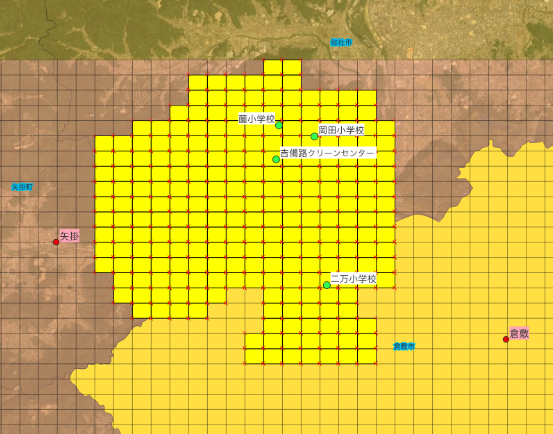

In [21]:
import pandas as pd
import psycopg2
import datetime
import matplotlib.pyplot as plt


#----------------------------------------------
# 訓練期間とテスト期間を日付で指定
train_start_date_test   = '2016-01-01 00:00:00'
train_end_date_test     = '2023-08-30 23:59:59'
test_start_date_test    = '2023-08-31 00:00:00'
test_end_date_test      = '2023-08-31 23:59:59'
#----------------------------------------------

name_trainPeriod='    Train('+train_start_date_test[0:10]+':'+train_end_date_test[0:10]+')'
print(name_trainPeriod)
name_testPeriod='    Test('+test_start_date_test[0:10]+':'+test_end_date_test[0:10]+')'
print(name_testPeriod)

print('SQL接続中...')

# データベースの接続情報
connection_config = {
    'user': 'shin',
    'password': 'shin_password',
    'port': '5432',
    'database': 'mobaku_base',
    'host': '10.33.230.198'
}




connection = psycopg2.connect(**connection_config)

with connection.cursor() as cursor:
    cursor.execute("SET pg_strom.enabled=off;")
    connection.commit()

# SQLクエリでデータの範囲を設定
sql_query = f"""
SELECT datetime, SUM(population) AS total_population
FROM population_00000
WHERE mesh_id IN ({','.join(areas_list)})

AND datetime BETWEEN '{train_start_date_test}' AND '{test_end_date_test}'
GROUP BY datetime
ORDER BY datetime;
"""

print('____________________')
print('SQL接続完了')
print('denji計算中...')

df = pd.read_sql(sql=sql_query, con=connection)

# 日付をインデックスに設定
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# 訓練データとテストデータに分割
df_train = df.loc[train_start_date_test:train_end_date_test]
df_test = df.loc[test_start_date_test:test_end_date_test]

# データフレームの表示（オプション）
print(df_train)
print(df_test)


    Train(2016-01-01:2023-08-30)
    Test(2023-08-31:2023-08-31)
SQL接続中...
____________________
SQL接続完了
denji計算中...


/tmp/ipykernel_1973710/116289694.py:55: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=sql_query, con=connection)


                     total_population
datetime                             
2016-01-01 00:00:00             24647
2016-01-01 01:00:00             25101
2016-01-01 02:00:00             25479
2016-01-01 03:00:00             25295
2016-01-01 04:00:00             25177
...                               ...
2023-08-30 19:00:00             21688
2023-08-30 20:00:00             21990
2023-08-30 21:00:00             22169
2023-08-30 22:00:00             22131
2023-08-30 23:00:00             22011

[67176 rows x 1 columns]
                     total_population
datetime                             
2023-08-31 00:00:00             22260
2023-08-31 01:00:00             21930
2023-08-31 02:00:00             22121
2023-08-31 03:00:00             22535
2023-08-31 04:00:00             22244
2023-08-31 05:00:00             22088
2023-08-31 06:00:00             21659
2023-08-31 07:00:00             21285
2023-08-31 08:00:00             19961
2023-08-31 09:00:00             19432
2023-08-31 10:00:00     

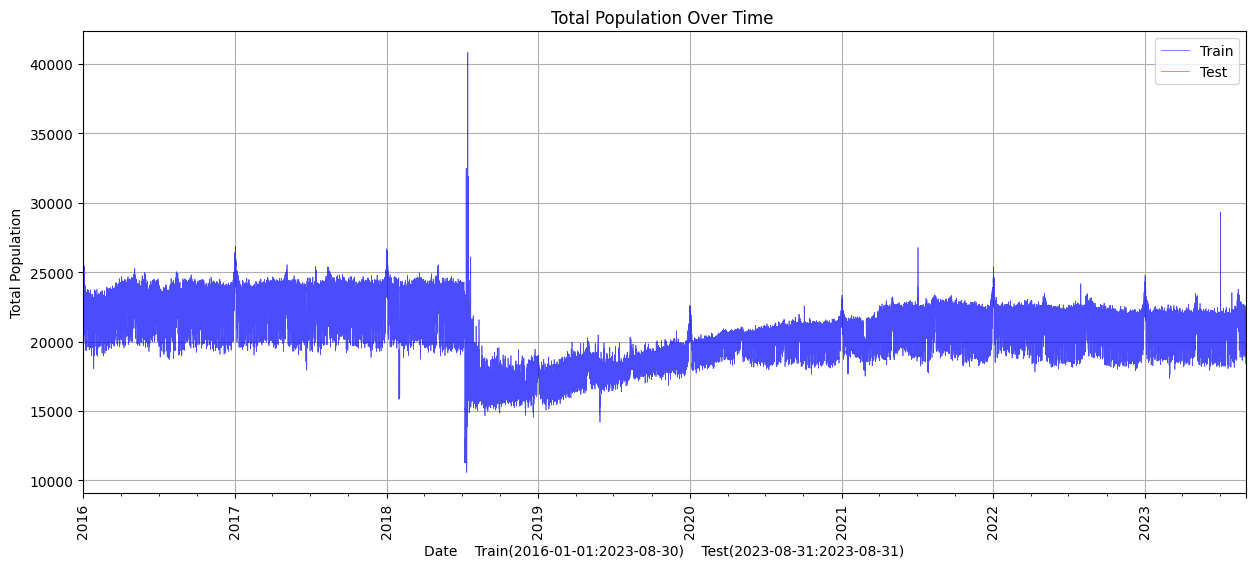

In [22]:
import matplotlib.dates as mdates

# グラフの描画
plt.figure(figsize=template1)
df_train['total_population'].plot(label='Train', linewidth='0.5',color='blue', alpha=0.7)
df_test['total_population'].plot(label='Test', linewidth='0.5',color='red', alpha=0.7)
plt.xlabel('Date'+name_trainPeriod+name_testPeriod)
plt.ylabel('Total Population')
plt.title('Total Population Over Time ')
plt.legend()
plt.grid()

# 横軸の表記を「英字＋90度回転」 にする
plt.xticks(rotation=90)

plt.show()

## エクセルから真備町の住民基本台帳を読み込む．
[URL](https://www.city.kurashiki.okayama.jp/dd.aspx?itemid=10290#itemid10290)

In [23]:
# Excelファイルの読み込み
excel_file_path = '../参考資料/真備町人口推移.xlsx'  # 読み込みたいExcelファイルのパスを指定
df_mabi_toukeisyo = pd.read_excel(excel_file_path, sheet_name='Sheet1')  # シート名を指定（任意）

# 読み込んだデータを表示
print(df_mabi_toukeisyo)

    Unnamed: 0  heisei/reiwa  seireki  months date  pop  diff  Unnamed: 7  \
0          NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
1          NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
2          NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
3          NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
4          NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
..         ...           ...      ...     ...  ...  ...   ...         ...   
95         NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
96         NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
97         NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
98         NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   
99         NaN           NaN      NaN     NaN  NaT  NaN   NaN         NaN   

   the pop is cacluated by the end of the month  Unnamed: 9  Unnamed: 10  \

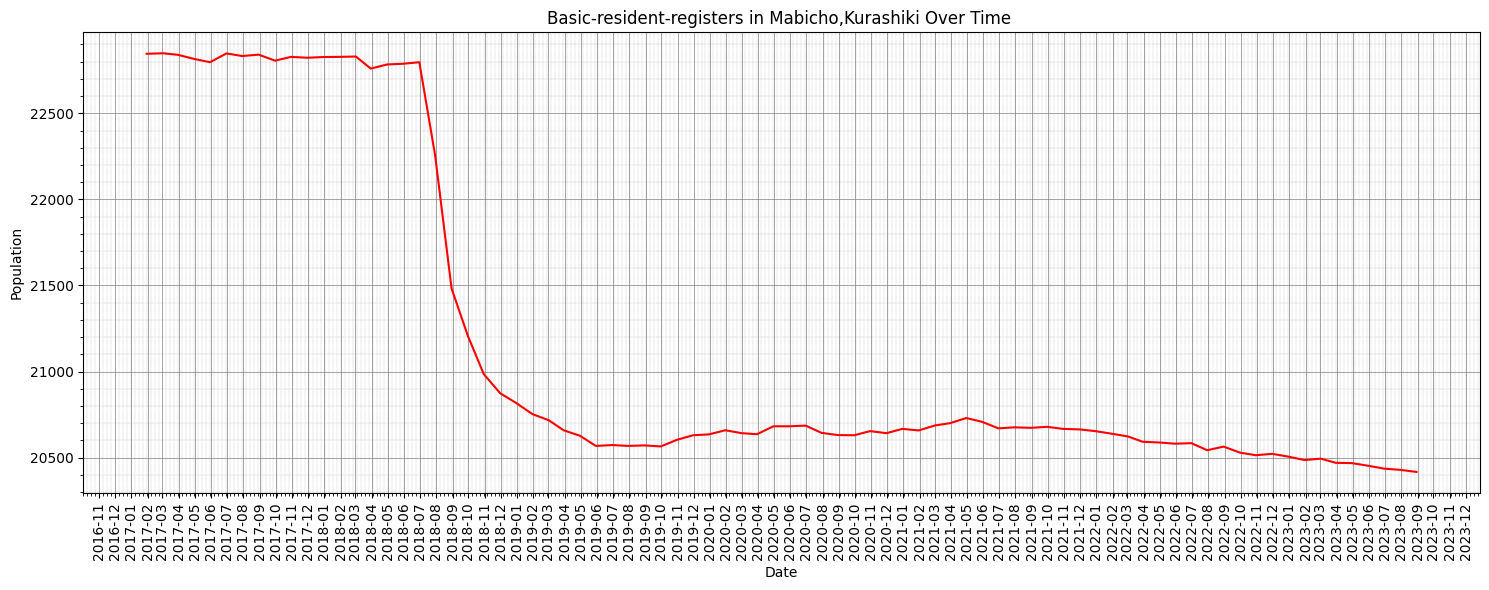

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 'date'列を日付形式に変換
df_mabi_toukeisyo['date'] = pd.to_datetime(df_mabi_toukeisyo['date'])

# 'pop'列を数値に変換（もし必要であれば）
df_mabi_toukeisyo['pop'] = pd.to_numeric(df_mabi_toukeisyo['pop'], errors='coerce')

# グラフの描画
plt.figure(figsize=template1)

# 倉敷市統計書
plt.plot(df_mabi_toukeisyo['date'], df_mabi_toukeisyo['pop'], linestyle='-', color='red')

# 軸ラベルの設定
plt.xlabel('Date')
plt.ylabel('Population')

# タイトルの設定
plt.title('Basic-resident-registers in Mabicho,Kurashiki Over Time ')

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')
# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='gray')

# X軸のフォーマット設定（年月表示）
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 毎月表示
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 年-月の形式
plt.xticks(rotation=90)

# グラフの表示
plt.tight_layout()
plt.show()

# 倉敷市統計書とmobakuデータを重ねる．

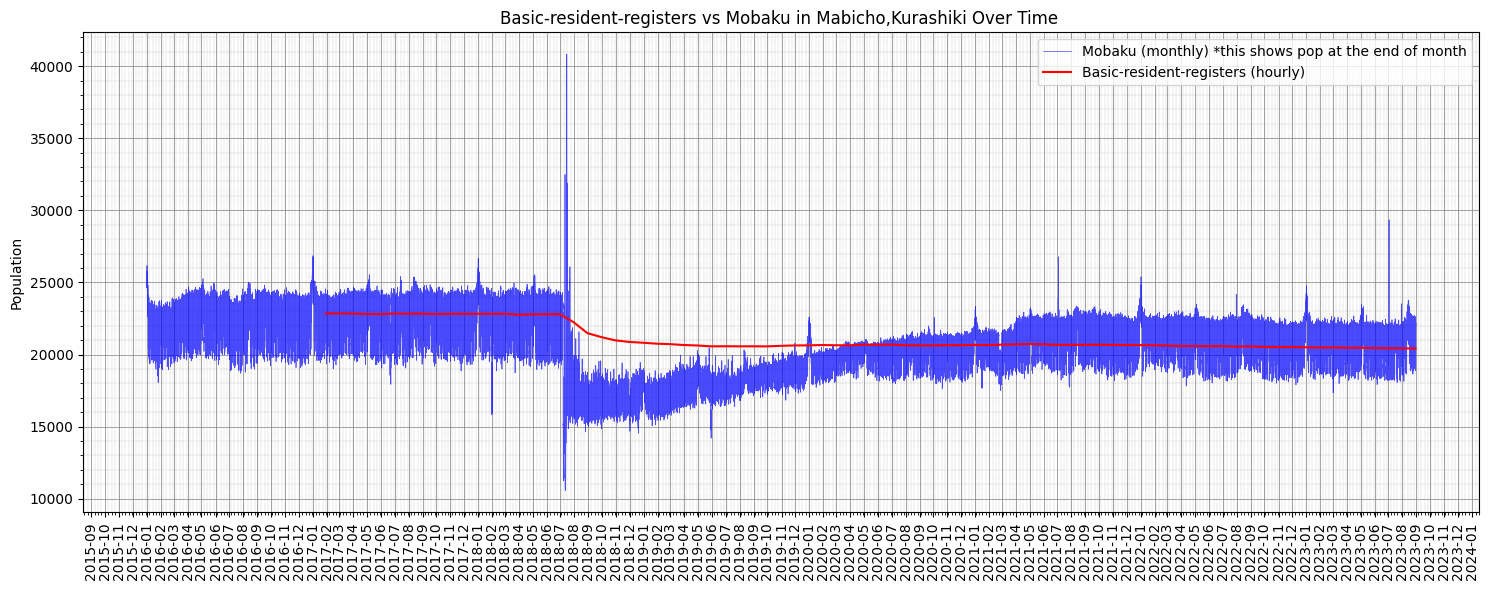

In [27]:
plt.figure(figsize=template1)

# mobaku (青: mobaku-data)
plt.plot(df_train['total_population'], linewidth='0.5', color='blue',label='Mobaku (monthly) *this shows pop at the end of month',alpha=0.7)
# 倉敷市統計書 (赤: Kurashiki-Official-resident)
plt.plot(df_mabi_toukeisyo['date'], df_mabi_toukeisyo['pop'], linestyle='-', color='red', label='Basic-resident-registers (hourly)')

# 軸ラベルの設定
# plt.xlabel('Date')
plt.ylabel('Population')

# タイトルの設定
plt.title('Basic-resident-registers vs Mobaku in Mabicho,Kurashiki Over Time ')

# 主グリッドの設定
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray')

# 補助グリッドの設定
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.3', color='gray')

# レジェンドの追加
plt.legend()

# X軸のフォーマット設定（年月表示）
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # 毎月表示
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # 年-月の形式
plt.xticks(rotation=90)

# グラフの表示
plt.tight_layout()
plt.show()